# Predictions, part II
- drop columns: no
- **scaler: yes**
- hyperparameter tuning: no
- one-hot encoding: yes, the dataset was found encoded
- oversampling: no

In the previous notebook, I tested the performance of every algorithm on the unscaled dataset.\
In this session, I repeated all the tests, now on the scaled data.
- AdaBoostClassifier(DecisionTreeClassifier) remains the best choice for data predictions in terms of accuracy and runtime,
- scaling improves the accuracy score of KNeighborsClassifier,
- it reduces the LogisticRegression runtime, requiring 4x less iterations;
- other algorithms see negligent or no change.

These are the best scores with Unscaled and Scaled data, expressed in %, sorted in descending order:
1. **AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, algorithm='SAMME') U 84.27, S 84.26**
2. BaggingClassifier(n_estimators=100, max_samples=1000): U 82.14, S 82.09
3. DecisionTreeClassifier(max_depth=10): U 81.93, S 81.94
4. RandomForestClassifier(n_estimators=100, max_samples=1000) U 81.78, S 81.79
5. GradientBoostingClassifier(n_estimators=100): U 81.49, S 81.49
6. LogisticRegression(max_iter=4000): U 80.84, S 80.14
7. KNeighborsClassifier(n_neighbors=2): U 79.04, S 81.79

6/7 algorithms keep the same order by performance; and only KNeighborsClassifier jumps from position 7 to 4.

# train_test_split

In [1]:
%run "common_imports.py"

df = pd.read_csv("../data/02.csv")
features = df.drop(columns=["is_canceled"])
target = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

display(X_train.head(), "")
display(y_train.head(), "")

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
104182,23,2,11,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
110320,102,17,24,4,1,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
60388,489,46,10,11,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
105591,36,7,12,2,2,1,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
73207,101,33,17,8,1,3,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0


''

104182    0
110320    0
60388     1
105591    0
73207     1
Name: is_canceled, dtype: int64

''

# scaler

In [2]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

display(X_train_df.head(), "")
display(X_test_df.head(), "")

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.031208,0.019231,0.333333,0.000000,0.000000,0.00,0.018182,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.138399,0.307692,0.766667,0.272727,0.052632,0.06,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.663501,0.865385,0.300000,0.909091,0.000000,0.04,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.048847,0.115385,0.366667,0.090909,0.105263,0.02,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.137042,0.615385,0.533333,0.636364,0.052632,0.06,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


''

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.028494,0.423077,0.100000,0.454545,0.105263,0.08,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.005427,0.019231,0.433333,0.000000,0.000000,0.02,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.025780,0.769231,0.166667,0.818182,0.000000,0.06,0.018182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.005427,0.019231,0.300000,0.000000,0.000000,0.04,0.018182,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.187246,0.480769,0.866667,0.454545,0.000000,0.06,0.036364,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


''

## KNeighborsClassifier
- **Accuracy = 81.79%**

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)
display(knn.fit(X_train_scaled, y_train), "")

accuracy = knn.score(X_test_scaled, y_test) * 100
print(f"KNN accuracy is {accuracy:.2f}% \n")

pred = knn.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test), "\n")

KNeighborsClassifier(n_neighbors=2)

''

KNN accuracy is 81.79% 

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     14940
           1       0.86      0.62      0.72      8902

    accuracy                           0.82     23842
   macro avg       0.83      0.78      0.79     23842
weighted avg       0.82      0.82      0.81     23842
 



## LogisticRegression
- **Accuracy = 80.14%**
- top 5 features by absolute coefficient
  - previous_cancellations 24.14
  - required_car_parking_spaces 22.02
  - avg_daily_rate 8.47
  - previous_bookings_not_canceled 6.32
  - adults 5.07

In [5]:
lr = LogisticRegression(max_iter=4000)
display(lr.fit(X_train_scaled, y_train), "")

accuracy = lr.score(X_test_scaled, y_test) * 100
print(f"Logistic Regression score is {accuracy:.2f}% \n")

pred = lr.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

# individual coefficients
coefficients = lr.coef_[0]
feature_names = X_train.columns
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coefficients_df["Absolute Coefficient"] = abs(coefficients_df["Coefficient"])
coefficients_df[["Coefficient", "Absolute Coefficient"]] = coefficients_df[["Coefficient", "Absolute Coefficient"]].round(2)
coefficients_df = coefficients_df.sort_values(by="Absolute Coefficient", ascending=False)
display(coefficients_df)

LogisticRegression(max_iter=4000)

''

Logistic Regression score is 80.14%
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     14940
           1       0.84      0.57      0.68      8902

    accuracy                           0.80     23842
   macro avg       0.82      0.76      0.77     23842
weighted avg       0.81      0.80      0.79     23842
 



,Feature,Coefficient,Absolute Coefficient
10,previous_cancellations,24.14,24.14
12,required_car_parking_spaces,-22.02,22.02
14,avg_daily_rate,8.47,8.47
11,previous_bookings_not_canceled,-6.32,6.32
6,adults,5.07,5.07
1,arrival_date_week_number,-3.58,3.58
13,total_of_special_requests,-3.56,3.56
44,deposit_type_Non_Refund,3.48,3.48
3,arrival_date_month,3.40,3.40
0,lead_time,2.87,2.87


## DecisionTreeClassifier
- seems unaffected by scaling, which is expected behavior as scaling isn't necessary for this algorithm.
- **score 81.94%**
- tree importance:
  - 'deposit_type_Non_Refund': '0.50',
  - 'lead_time': '0.10',
  - 'total_of_special_requests': '0.10',
  - 'market_segment_Online_TA': '0.08',
  - 'previous_cancellations': '0.07',
  - 'required_car_parking_spaces': '0.04',
  - 'customer_type_Transient': '0.03',
  - 'avg_daily_rate': '0.02',
  - 'arrival_date_week_number': '0.01',
  - 'adults': '0.01',
  - 'previous_bookings_not_canceled': '0.01',
  - 'hotel_Resort': '0.01'
  -  the remaining features = 0.00

DecisionTreeClassifier(max_depth=10)

''

Decision Tree accuracy is 81.93%
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     14940
           1       0.84      0.63      0.72      8902

    accuracy                           0.82     23842
   macro avg       0.83      0.78      0.79     23842
weighted avg       0.82      0.82      0.81     23842
 



{'deposit_type_Non_Refund': '0.50',
 'lead_time': '0.10',
 'total_of_special_requests': '0.10',
 'market_segment_Online_TA': '0.08',
 'previous_cancellations': '0.07',
 'required_car_parking_spaces': '0.04',
 'customer_type_Transient': '0.03',
 'avg_daily_rate': '0.02',
 'arrival_date_week_number': '0.01',
 'adults': '0.01',
 'previous_bookings_not_canceled': '0.01',
 'hotel_Resort': '0.01',
 'arrival_date_day_of_month': '0.00',
 'arrival_date_month': '0.00',
 'stays_in_weekend_nights': '0.00',
 'stays_in_week_nights': '0.00',
 'children': '0.00',
 'babies': '0.00',
 'is_repeated_guest': '0.00',
 'booked_by_company': '0.00',
 'booked_by_agent': '0.00',
 'hotel_City': '0.00',
 'meal_BB': '0.00',
 'meal_FB': '0.00',
 'meal_HB': '0.00',
 'meal_No_meal': '0.00',
 'market_segment_Aviation': '0.00',
 'market_segment_Complementary': '0.00',
 'market_segment_Corporate': '0.00',
 'market_segment_Direct': '0.00',
 'market_segment_Groups': '0.00',
 'market_segment_Offline_TA_TO': '0.00',
 'distri

''

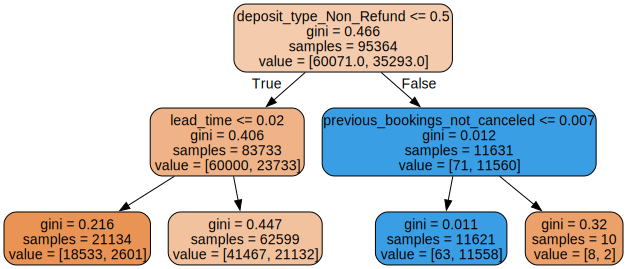

In [8]:
dt = DecisionTreeClassifier(max_depth=10)
display(dt.fit(X_train_scaled, y_train), "")

accuracy = dt.score(X_test_scaled, y_test) * 100
print(f"Decision Tree accuracy is {accuracy:.2f}% \n")

pred = dt.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

tree_importance = {feature: f"{importance:.2f}" for feature, importance in zip(X_train.columns, dt.feature_importances_)}
sorted_tree_importance = {k: v for k, v in sorted(tree_importance.items(), key=lambda item: item[1], reverse=True)}
display(sorted_tree_importance, "")

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_scaled, y_train)

dot_data = export_graphviz(dt, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Ensemble methods

### BaggingClassifier

1. **BaggingClassifier without specified base estimator returns the highest accuracy = 82.09%**
2. KNeighborsClassifier = 78.42%
3. LogisticRegression = 77.90%
4. DecisionTreeClassifier = 81.58%
5. RandomForestClassifier = 81.39%
6. GradientBoostingClassifier = 81.43%

In [9]:
#1

bagging = BaggingClassifier(n_estimators=100, max_samples=1000)
display(bagging.fit(X_train_scaled, y_train), "")

accuracy = bagging.score(X_test_scaled, y_test) * 100
print(f"Bagging accuracy is {accuracy:.2f}% \n")

pred = bagging.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(max_samples=1000, n_estimators=100)

''

Bagging accuracy is 82.09%
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     14940
           1       0.85      0.63      0.73      8902

    accuracy                           0.82     23842
   macro avg       0.83      0.78      0.80     23842
weighted avg       0.82      0.82      0.81     23842
 



In [10]:
#2

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=2), n_estimators=100, max_samples=1000)
display(bagging_knn.fit(X_train_scaled, y_train), "")

accuracy = bagging_knn.score(X_test_scaled, y_test) * 100
print(f"Bagging KNN accuracy is {accuracy:.2f}% \n")

pred = bagging_knn.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=2),
                  max_samples=1000, n_estimators=100)

''

Bagging KNN accuracy is 78.42%
              precision    recall  f1-score   support

           0       0.77      0.94      0.84     14940
           1       0.83      0.53      0.65      8902

    accuracy                           0.78     23842
   macro avg       0.80      0.73      0.75     23842
weighted avg       0.79      0.78      0.77     23842
 



In [11]:
#3

bagging_lr = BaggingClassifier(LogisticRegression(max_iter=4000), n_estimators=100, max_samples=1000)
display(bagging_lr.fit(X_train_scaled, y_train), "")

accuracy = bagging_lr.score(X_test_scaled, y_test) * 100
print(f"Bagging LR accuracy is {accuracy:.2f}% \n")

pred = bagging_lr.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

BaggingClassifier(estimator=LogisticRegression(max_iter=4000), max_samples=1000,
                  n_estimators=100, verbose=3)

''

Bagging LR accuracy is 77.90%
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     14940
           1       0.89      0.47      0.61      8902

    accuracy                           0.78     23842
   macro avg       0.82      0.72      0.73     23842
weighted avg       0.80      0.78      0.76     23842
 



In [12]:
#4

bagging_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, max_samples = 1000)
display(bagging_dt.fit(X_train_scaled, y_train), "")

accuracy = bagging_dt.score(X_test_scaled, y_test) * 100
print(f"Bagging DT accuracy is {accuracy:.2f}% \n")

pred = bagging_dt.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=1000, n_estimators=100)

''

Bagging DT accuracy is 81.58%
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14940
           1       0.85      0.61      0.71      8902

    accuracy                           0.82     23842
   macro avg       0.83      0.77      0.79     23842
weighted avg       0.82      0.82      0.81     23842
 



In [13]:
#5

bagging_rf = BaggingClassifier(RandomForestClassifier(), n_estimators=100, max_samples=1000)
display(bagging_rf.fit(X_train_scaled, y_train), "")

accuracy = bagging_rf.score(X_test_scaled, y_test) * 100
print(f"Bagging RF accuracy is {accuracy:.2f}% \n")

pred = bagging_rf.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

BaggingClassifier(estimator=RandomForestClassifier(), max_samples=1000,
                  n_estimators=100, verbose=3)

''

Bagging RF accuracy is 81.39%
              precision    recall  f1-score   support

           0       0.79      0.95      0.87     14940
           1       0.88      0.58      0.70      8902

    accuracy                           0.81     23842
   macro avg       0.84      0.77      0.78     23842
weighted avg       0.83      0.81      0.80     23842
 



In [14]:
#6

bagging_gb = BaggingClassifier(GradientBoostingClassifier(), n_estimators=100, max_samples=1000)
display(bagging_gb.fit(X_train_scaled, y_train), "")

accuracy = bagging_gb.score(X_test_scaled, y_test) * 100
print(f"Bagging GB accuracy is {accuracy:.2f}% \n")

pred = bagging_gb.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

BaggingClassifier(estimator=GradientBoostingClassifier(), max_samples=1000,
                  n_estimators=100, verbose=3)

''

Bagging GB accuracy is 81.43%
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14940
           1       0.86      0.60      0.71      8902

    accuracy                           0.81     23842
   macro avg       0.83      0.77      0.79     23842
weighted avg       0.82      0.81      0.81     23842
 



### RandomForestClassifier
- **Accuracy = 81.79%**

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_samples=1000)
display(rf.fit(X_train_scaled, y_train), "")

accuracy = rf.score(X_test_scaled, y_test) * 100
print(f"RandomForest accuracy is {accuracy:.2f}% \n")

pred = rf.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

RandomForestClassifier(max_samples=1000)

''

RandomForest accuracy is 81.79%
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     14940
           1       0.87      0.60      0.71      8902

    accuracy                           0.82     23842
   macro avg       0.83      0.77      0.79     23842
weighted avg       0.83      0.82      0.81     23842
 



### GradientBoosting
- **Accuracy = 81.49%**

In [16]:
gb = GradientBoostingClassifier(n_estimators=100)
display(gb.fit(X_train_scaled, y_train), "")

accuracy = gb.score(X_test_scaled, y_test) * 100
print(f"GradientBoosting accuracy is {accuracy:.2f}% \n")

pred = gb.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

GradientBoostingClassifier()

''

GradientBoosting accuracy is 81.49%
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     14940
           1       0.84      0.62      0.72      8902

    accuracy                           0.81     23842
   macro avg       0.82      0.78      0.79     23842
weighted avg       0.82      0.81      0.81     23842
 



### AdaBoost
1. accuracy without specifying base estimator = 81.06%
2. LogisticRegression = 75.77%
3. **DecisionTreeClassifier = 84.26%, ct 1m**
4. RandomForestClassifier = 85.46%; higher than with DecisionTree but runtime time 7m vs 1m with DecisionTree
5. GradientBoostingClassifier(max_depth=10) won't execute
5. GradientBoostingClassifier() = 83.59%; warning: runtime 17m

In [17]:
#1

ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
display(ab.fit(X_train_scaled, y_train), "")

accuracy = ab.score(X_test_scaled, y_test) * 100
print(f"AdaBoost accuracy is {accuracy:.2f}% \n")

pred = ab.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

''

AdaBoost accuracy is 81.06%
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     14940
           1       0.83      0.62      0.71      8902

    accuracy                           0.81     23842
   macro avg       0.82      0.77      0.78     23842
weighted avg       0.81      0.81      0.80     23842
 



In [18]:
#2

ab_lr = AdaBoostClassifier(LogisticRegression(max_iter=1000), n_estimators=100, algorithm='SAMME')
display(ab_lr.fit(X_train_scaled, y_train), "")

accuracy = ab_lr.score(X_test_scaled, y_test) * 100
print(f"AdaBoost LR accuracy is {accuracy:.2f}% \n")

pred = ab_lr.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(max_iter=1000),
                   n_estimators=100)

''

AdaBoost LR accuracy is 75.77%
              precision    recall  f1-score   support

           0       0.76      0.90      0.82     14940
           1       0.76      0.51      0.61      8902

    accuracy                           0.76     23842
   macro avg       0.76      0.71      0.72     23842
weighted avg       0.76      0.76      0.74     23842
 



In [19]:
#3

ab_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, algorithm='SAMME')
display(ab_dt.fit(X_train_scaled, y_train), "")

accuracy = ab_dt.score(X_test_scaled, y_test) * 100
print(f"AdaBoost DT accuracy is {accuracy:.2f}% \n")

pred = ab_dt.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=100)

''

AdaBoost DT accuracy is 84.26%
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14940
           1       0.83      0.73      0.78      8902

    accuracy                           0.84     23842
   macro avg       0.84      0.82      0.83     23842
weighted avg       0.84      0.84      0.84     23842
 



In [20]:
#4

ab_rf = AdaBoostClassifier(RandomForestClassifier(max_depth=10), n_estimators=100, algorithm='SAMME')
display(ab_rf.fit(X_train_scaled, y_train), "")

accuracy = ab_rf.score(X_test_scaled, y_test) * 100
print(f"AdaBoost RF accuracy is {accuracy:.2f}% \n")

pred = ab_rf.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(max_depth=10),
                   n_estimators=100)

''

AdaBoost RF accuracy is 85.46%
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     14940
           1       0.84      0.76      0.80      8902

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842
 



In [21]:
#5

ab_gb = AdaBoostClassifier(GradientBoostingClassifier(), n_estimators=100, algorithm='SAMME')
display(ab_gb.fit(X_train_scaled, y_train), "")

accuracy = ab_gb.score(X_test_scaled, y_test) * 100
print(f"AdaBoost GB accuracy is {accuracy:.2f}% \n")

pred = ab_gb.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

AdaBoostClassifier(algorithm='SAMME', estimator=GradientBoostingClassifier(),
                   n_estimators=100)

''

AdaBoost GB accuracy is 83.59%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     14940
           1       0.83      0.70      0.76      8902

    accuracy                           0.84     23842
   macro avg       0.83      0.81      0.82     23842
weighted avg       0.84      0.84      0.83     23842
 



Next: notebook_06_machine_learning_03_hyperparameter_tuning